In [27]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import folium
import datetime as dt
import altair as alt
%matplotlib inline

In [4]:
july_scooter = pd.read_csv('data/july.csv')
july_scooter.head()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [5]:
july_scooter.sumdgroup.value_counts()

scooter    20193663
Scooter     4872861
bicycle        8921
Name: sumdgroup, dtype: int64

In [6]:
#Total Count of scooters that belong to each company sorted by ID number.
july_groups = july_scooter.groupby('companyname')['sumdid'].nunique()
july_groups

companyname
Bird      2583
Bolt       276
Gotcha     224
Jump      1206
Lime       903
Lyft      1026
Spin       570
Name: sumdid, dtype: int64

In [7]:
july_scooter.companyname.unique()

array(['Lyft', 'Bird', 'Spin', 'Bolt', 'Jump', 'Lime', 'Gotcha'],
      dtype=object)

In [8]:
july_scooter.sumdid.value_counts()

StandardNW5HJFO4R32LY                          8921
PoweredK7VBEW7S2VHPG                           8915
PoweredSMYDSCUCCKE3D                           8910
PoweredCPBMGOVZOHE4Z                           8909
Powerede4138a33-4d2e-5ce4-ad3c-9da496472b9d    8901
                                               ... 
Powered3ZPZ7                                      1
Powered5WF3M                                      1
Powered2045928                                    1
PoweredMMQC4MGMOH675                              1
PoweredCPHMRCMZUUDRA                              1
Name: sumdid, Length: 6788, dtype: int64

In [9]:
july_scooter.costpermin.value_counts()

0.15    12569385
0.06    10367575
0.23     1750583
0.30      378981
0.05        8921
Name: costpermin, dtype: int64

In [10]:
july_date_separate = july_scooter.pubdatetime.str.split(" ", expand=True)
july_date_separate.head()

,0,1
0,2019-07-01,00:00:33.550000
1,2019-07-01,00:00:34.973000
2,2019-07-01,00:00:41.183000
3,2019-07-01,00:00:41.620000
4,2019-07-01,00:00:45.087000


In [11]:
july_scooter = july_date_separate.join(july_scooter, how='outer')
july_scooter.head()

,0,1,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01,00:00:33.550000,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01,00:00:34.973000,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01,00:00:41.183000,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01,00:00:41.620000,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01,00:00:45.087000,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [12]:
july_scooter = july_scooter.drop(columns = 'pubdatetime')
july_scooter.head()

,0,1,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01,00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01,00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01,00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01,00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01,00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [13]:
july_scooter.columns = ['date', 'time', 'latitude', 'longitude', 'sumdid', 'sumdtype', 'chargelevel', 'sumdgroup', 'costpermin', 'companyname']
july_scooter.head()

,date,time,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01,00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01,00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01,00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01,00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01,00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [14]:
july_trip = pd.read_csv('data/july_trip.csv')
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [15]:
# change time from object to datetime
july_scooter['date']=pd.to_datetime(july_scooter['date'])
july_scooter.dtypes

date           datetime64[ns]
time                   object
latitude              float64
longitude             float64
sumdid                 object
sumdtype               object
chargelevel           float64
sumdgroup              object
costpermin            float64
companyname            object
dtype: object

In [16]:
def get_dom(dt):
    return dt.day

july_scooter['dom'] = july_scooter['date'].map(get_dom)

july_scooter.tail()

,date,time,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname,dom
25075440,2019-07-31,23:59:57,36.162420,-86.779314,Powered-1a8321d0-5c21-04a4-bd7d-7b96ba51f17b,Powered,100.00,Scooter,0.3,Bolt,31
25075441,2019-07-31,23:59:57,36.146010,-86.810197,Powered-bd4ba83b-513f-ed5c-3c51-b4f51e7fdc51,Powered,100.00,Scooter,0.3,Bolt,31
25075442,2019-07-31,23:59:57,36.165837,-86.777765,Powered-cc9c0b7e-2b9e-def9-e48b-1a8a489c4daf,Powered,71.68,Scooter,0.3,Bolt,31
25075443,2019-07-31,23:59:57,36.149792,-86.806818,Powered-55a7ac02-7e17-bb3b-130d-b160d9776405,Powered,0.00,Scooter,0.3,Bolt,31
25075444,2019-07-31,23:59:57,36.162644,-86.779345,Powered-03be23ca-d43b-222f-be54-e44b5b4690df,Powered,100.00,Scooter,0.3,Bolt,31


In [17]:
july_scooter.drop(['sumdtype', 'sumdgroup', 'costpermin'], axis=1, inplace=True)


In [18]:
list(july_scooter.columns)

['date',
 'time',
 'latitude',
 'longitude',
 'sumdid',
 'chargelevel',
 'companyname',
 'dom']

In [19]:
july_scooter.head()

,date,time,latitude,longitude,sumdid,chargelevel,companyname,dom
0,2019-07-01,00:00:33.550000,36.156678,-86.809004,Powered635135,22.0,Lyft,1
1,2019-07-01,00:00:34.973000,36.145674,-86.794138,Powered790946,33.0,Lyft,1
2,2019-07-01,00:00:41.183000,36.179319,-86.751538,Powered570380,76.0,Lyft,1
3,2019-07-01,00:00:41.620000,36.152111,-86.803821,Powered240631,43.0,Lyft,1
4,2019-07-01,00:00:45.087000,36.149355,-86.797550,Powered970404,52.0,Lyft,1


In [24]:
#HeatMapWithTime()
#First, create a list containing the list of values that we wish to plot, grouped by the dimension that we want to use (in this example we will be using day of month as the dimension).
df_dom_list = []
for dom in july_scooter.dom.sort_values().unique():
    df_dom_list.append(july_scooter.loc[july_scooter.dom == dom, ['latitude', 'longitude', 'sumdid']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())

In [34]:
def generateBaseMap(default_location=[36.1627, -86.7816], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [56]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap()
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_dom_list, radius=5, gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'
}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

TypeError: __init__() got an unexpected keyword argument 'gradient'

In [50]:
july_scooter.loc[0]

date           2019-07-01 00:00:00
time               00:00:33.550000
latitude                   36.1567
longitude                  -86.809
sumdid               Powered635135
chargelevel                     22
companyname                   Lyft
dom                              1
Name: 0, dtype: object

Text(0.5, 1.0, 'Frequency by DoM - Nashville Scooter - July 2019')

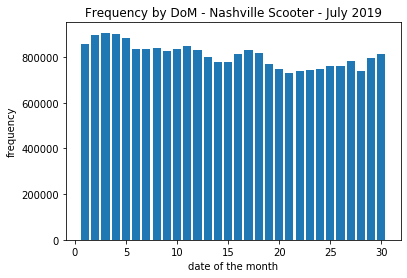

In [19]:

plt.hist(july_scooter.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DoM - Nashville Scooter - July 2019')

In [20]:
def get_weekday(dt):
    return dt.weekday()

july_scooter['weekday'] = july_scooter['date'].map(get_weekday)

july_scooter.tail()

,date,time,latitude,longitude,sumdid,chargelevel,companyname,dom,weekday
25075440,2019-07-31,23:59:57,36.162420,-86.779314,Powered-1a8321d0-5c21-04a4-bd7d-7b96ba51f17b,100.00,Bolt,31,2
25075441,2019-07-31,23:59:57,36.146010,-86.810197,Powered-bd4ba83b-513f-ed5c-3c51-b4f51e7fdc51,100.00,Bolt,31,2
25075442,2019-07-31,23:59:57,36.165837,-86.777765,Powered-cc9c0b7e-2b9e-def9-e48b-1a8a489c4daf,71.68,Bolt,31,2
25075443,2019-07-31,23:59:57,36.149792,-86.806818,Powered-55a7ac02-7e17-bb3b-130d-b160d9776405,0.00,Bolt,31,2
25075444,2019-07-31,23:59:57,36.162644,-86.779345,Powered-03be23ca-d43b-222f-be54-e44b5b4690df,100.00,Bolt,31,2


july_scooter.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)
# title and x,y labels
plt.title('Nashville Scooters July 2019', fontsize=20)
plt.xlabel('Date of the month',fontsize=16)
plt.ylabel('Frequency',fontsize=16);

#for k, rows in july_scooter.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_company = july_scooter.groupby('companyname').apply(count_rows)
by_company

#for k, rows in july_scooter.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_date = july_scooter.groupby('dom').apply(count_rows)
by_date


by_date_sorted = by_date.sort_values()
by_date_sorted

plt.plot(by_date)

In [21]:
# subset the data for Bird
bird_july = july_scooter.loc[july_scooter.companyname == 'Bird']
bird_july.head()

,date,time,latitude,longitude,sumdid,chargelevel,companyname,dom,weekday
356,2019-07-01,00:01:50.957000,36.163417,-86.779597,PoweredPH3LM,80.0,Bird,1,0
357,2019-07-01,00:01:50.957000,36.155279,-86.786279,Powered46ZQH,48.0,Bird,1,0
358,2019-07-01,00:01:50.957000,36.198123,-86.766940,Powered8X3NR,50.0,Bird,1,0
359,2019-07-01,00:01:50.957000,36.155505,-86.785245,PoweredDBUMF,100.0,Bird,1,0
360,2019-07-01,00:01:50.957000,36.136868,-86.808101,PoweredP7JJ6,100.0,Bird,1,0


In [22]:
bird_july.shape

(3702282, 9)

In [23]:
bird_july.sumdid.unique()

array(['PoweredPH3LM', 'Powered46ZQH', 'Powered8X3NR', ...,
       'Powered216IW', 'PoweredQR6KS', 'PoweredVNWRA'], dtype=object)

In [24]:
bird_july.sumdid.value_counts()

PoweredNTCGG    3682
PoweredFWI2W    3604
PoweredM76B1    3575
PoweredVAW9Y    3539
PoweredTZIK8    3523
                ... 
PoweredPGT79       2
PoweredF5ALZ       2
Powered5WF3M       1
PoweredA9GT8       1
Powered3ZPZ7       1
Name: sumdid, Length: 2583, dtype: int64

In [25]:
bird_july_NTCGG = bird_july.loc[bird_july['sumdid'] == 'PoweredNTCGG']
bird_july_NTCGG.head()


,date,time,latitude,longitude,sumdid,chargelevel,companyname,dom,weekday
3641,2019-07-01,00:06:51.217000,36.179116,-86.790628,PoweredNTCGG,44.0,Bird,1,0
6572,2019-07-01,00:11:51.303000,36.179116,-86.790628,PoweredNTCGG,44.0,Bird,1,0
9867,2019-07-01,00:16:51.567000,36.179097,-86.790669,PoweredNTCGG,46.0,Bird,1,0
13427,2019-07-01,00:21:51.887000,36.179097,-86.790669,PoweredNTCGG,46.0,Bird,1,0
16879,2019-07-01,00:26:52.217000,36.179084,-86.790630,PoweredNTCGG,46.0,Bird,1,0


In [26]:
bird_july_NTCGG.shape

(3682, 9)

In [27]:
bird_july_NTCGG[bird_july_NTCGG.latitude == bird_july_NTCGG.latitude.min ()]


,date,time,latitude,longitude,sumdid,chargelevel,companyname,dom,weekday
5215854,2019-07-06,22:22:06.450000,36.12386,-86.789945,PoweredNTCGG,67.0,Bird,6,5
5219823,2019-07-06,22:27:06.737000,36.12386,-86.789945,PoweredNTCGG,67.0,Bird,6,5


In [28]:
#The final cleaning step consists of evaluating whether there are duplicated entries in the data frame. If so, we will remove these duplicated entries from the data frame, as they represent the same car accident.
bird_july_NTCGG_drp = bird_july_NTCGG[['date', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]
bird_july_NTCGG_drp.head()

,date,latitude,longitude,sumdid,chargelevel,companyname
3641,2019-07-01,36.179116,-86.790628,PoweredNTCGG,44.0,Bird
6572,2019-07-01,36.179116,-86.790628,PoweredNTCGG,44.0,Bird
9867,2019-07-01,36.179097,-86.790669,PoweredNTCGG,46.0,Bird
13427,2019-07-01,36.179097,-86.790669,PoweredNTCGG,46.0,Bird
16879,2019-07-01,36.179084,-86.790630,PoweredNTCGG,46.0,Bird


In [29]:
bird_july_NTCGG_drp.drop_duplicates(inplace=False)
bird_july_NTCGG_drp.head()

,date,latitude,longitude,sumdid,chargelevel,companyname
3641,2019-07-01,36.179116,-86.790628,PoweredNTCGG,44.0,Bird
6572,2019-07-01,36.179116,-86.790628,PoweredNTCGG,44.0,Bird
9867,2019-07-01,36.179097,-86.790669,PoweredNTCGG,46.0,Bird
13427,2019-07-01,36.179097,-86.790669,PoweredNTCGG,46.0,Bird
16879,2019-07-01,36.179084,-86.790630,PoweredNTCGG,46.0,Bird


In [30]:
bird_july_NTCGG_drp.shape

(3682, 6)

In [31]:
bird_july_NTCGG_drp[bird_july_NTCGG_drp.latitude == bird_july_NTCGG_drp.latitude.min ()]

,date,latitude,longitude,sumdid,chargelevel,companyname
5215854,2019-07-06,36.12386,-86.789945,PoweredNTCGG,67.0,Bird
5219823,2019-07-06,36.12386,-86.789945,PoweredNTCGG,67.0,Bird


In [32]:
bird_july_NTCGG_drp[bird_july_NTCGG_drp.latitude == bird_july_NTCGG_drp.latitude.max ()]

,date,latitude,longitude,sumdid,chargelevel,companyname
39873,2019-07-01,36.179188,-86.790803,PoweredNTCGG,46.0,Bird
42486,2019-07-01,36.179188,-86.790803,PoweredNTCGG,46.0,Bird


In [33]:
from folium import plugins

# Create a map object of the city of Nashville
nashville_tn_map= folium.Map(location=[36.1627, -86.7816], zoom_start=12)
bird_july_subset2 = bird_july_NTCGG_drp.head(1500)

# Instantiate a mark cluster object for the scooters
scooters = plugins.MarkerCluster().add_to(nashville_tn_map)

# Display only scooter locations
for lat, lng, label in zip(bird_july_subset2.latitude, bird_july_subset2.longitude, bird_july_subset2.sumdid.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(scooters)

# Display map
display(nashville_tn_map)

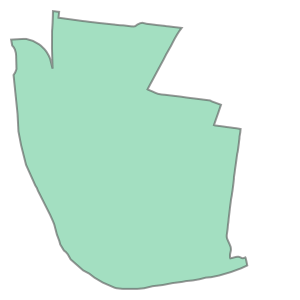

In [35]:
promise_zones = gpd.read_file('MDHA_Promise_Zones/Export_Output_5.shp')
promise_zones.loc[0, 'geometry']


In [36]:
folium.GeoJson(promise_zones).add_to(nashville_tn_map)
nashville_tn_map

In [37]:
#Create a map object of the city of Nashville
nashville_tn_map= folium.Map(location=[36.1627, -86.7816], zoom_start=12)
bird_july_subset = bird_july_NTCGG_drp.head(100)

# Display only the where one scooter record
for lat, lng, label in zip(bird_july_subset.latitude, bird_july_subset.longitude, bird_july_subset.sumdid.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(nashville_tn_map)
    
# Show map
display(nashville_tn_map)

In [39]:

folium.GeoJson(promise_zones).add_to(nashville_tn_map)
nashville_tn_map

In [ ]:
july_scooter['geometry'] = july_scooter.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
july_scooter.head()

In [ ]:
july_scooter_geo = gpd.GeoDataFrame(july_scooter, crs = promise_zones.crs, geometry = july_scooter['geometry'])

In [ ]:
promise_zones_july_scooter = gpd.sjoin(july_scooter_geo, promise_zones, op = 'within')

In [ ]:
promise_zones_july_scooter.head()

In [ ]:
promise_zones_july_scooter[['companyname', 'sumdid']].groupby('companyname').agg('count').sort_values(by ='sumdid', ascending = False)

In [ ]:
urban_polygon = promise_zones_july_scooter.loc[promise_zones_july_scooter.sumdid == 'Jump']
urban_polygon.head() 

In [ ]:
promise_zones.plot(column='ZONE_ID', figsize=(10,8))

In [ ]:
folium.GeoJson(bird_july_subset2).add_to(nashville_tn_map)

for index, row_values in july_scooter.iterrows():
   loc = [row_values['latitude'], row_values['longitude']]
   pop = (str(row_values['sumdid']) + ': ' +
            str(row_values['date']) + '<br/>' +
            str(row_values['time'])).replace("'", "`")
   marker = folium.Marker(location = loc, popup = pop)
   marker.add_to(promise_zones)
#display our map
display(promise_zones)

#### Analyze the weekday

In [ ]:
plt.hist(july_scooter.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

#### cross analysis (hour, dow)

In [ ]:
by_cross = july_scooter.groupby('weekday'.split()).apply(count_rows).unstack()

In [ ]:
june_scooter = pd.read_csv('data/june.csv')
june_scooter.head()

In [ ]:
june_scooter.sumdgroup.value_counts()

In [ ]:
june_scooter.companyname.unique()

In [ ]:
june_scooter.costpermin.value_counts()

In [ ]:
#parsing the pubdatetime into date and time columns
june_date_separate = june_scooter.pubdatetime.str.split(" ", expand=True)
june_date_separate.head()

In [ ]:
june_scooter = june_date_separate.join(june_scooter, how = 'outer')
june_scooter.head()

In [ ]:
#drop the columns pubdatetime
june_scooter = june_scooter.drop(columns = 'pubdatetime')
june_scooter.head()

In [ ]:
#renaming the columns
june_scooter.columns = ['date', 'time', 'latitude', 'longitude', 'sumdid', 'sumdtype', 'chargelevel', 'sumdgroup', 'costpermin', 'companyname']
june_scooter.head()

In [ ]:
june_scooter.dtypes

In [ ]:
#change date from object to-datetime
june_scooter['date']=pd.to_datetime(june_scooter['date'])
june_scooter.dtypes

In [ ]:
june_scooter.sumdid.value_counts()

In [ ]:
may_scooter  = pd.read_csv('data/may.csv')
may_scooter.head()

In [ ]:
may_scooter.companyname.unique()

In [ ]:
may_scooter.costpermin.value_counts()

In [ ]:
may_date_separate = may_scooter.pubdatetime.str.split(" ", expand=True)
may_date_separate.head()

In [ ]:
may_scooter= may_date_separate.join(may_scooter, how= 'outer')
may_scooter.head()

In [ ]:
may_scooter= may_scooter.drop(columns = 'pubdatetime')

In [ ]:
may_scooter.columns = ['date', 'time', 'latitude', 'longitude', 'sumdid', 'sumdtype', 'chargelevel', 'sumdgroup', 'costpermin', 'companyname']
may_scooter.head()

In [ ]:
may_scooter['sumdtype'].value_counts()

In [ ]:
may_scooter['sumdgroup'].value_counts()

In [ ]:
# dropping sumdtype
july_scooter_new = july_scooter.drop(columns = 'sumdtype')
july_scooter_new.head()

In [ ]:
june_scooter_new = june_scooter.drop(columns = 'sumdtype')
june_scooter_new.head()

In [ ]:
may_scooter_new = may_scooter.drop(columns = 'sumdtype')
may_scooter_new.head()

In [ ]:
july_bird = july_scooter_new.loc[july_scooter_new.companyname == 'Bird']

In [ ]:
july_bird.head()

In [ ]:
july_gotcha = july_scooter_new.loc[july_scooter_new.companyname == 'Gotcha']

In [ ]:
july_gotcha.head()

In [ ]:
july_bird['sumdid'].value_counts()

In [ ]:
total_rides = pd.concat([may_scooter_new,june_scooter_new,july_scooter_new])
total_rides.shape

We see that there are 73,414,043 rides over the past 3 months. 

In [ ]:
total_rides.head()

In [ ]:
june_1 = june_scooter[(june_scooter['sumdid']=='Powered93627c35-0f62-5b81-a78d-75a4a92ecf47')]  
june_1.head()

In [ ]:
june_1 = june_scooter[(june_scooter['sumdid']=='Powered93627c35-0f62-5b81-a78d-75a4a92ecf47')]  
june_1.tail()

june_precise = june_scooter_new[['latitude','longitude','sumdid','companyname']]
june_precise = june_precise.sort_values(by = 'sumdid')


may_scooter_new['new_date'] = [d.date() for d in july_scooter_new['pubdatetime']]
may_scooter_new['new_time'] = [d.time() for d in july_scooter_new['pubdatetime']]

In [ ]:
total_rides.sumdid.unique()

In [ ]:
Powered216IW = total_rides[(total_rides['sumdid']== 'Powered216IW')]

In [ ]:
Powered216IW.head()

In [ ]:
PoweredQR6KS = total_rides[(total_rides['sumdid']== 'PoweredQR6KS')]

In [ ]:
PoweredQR6KS

In [ ]:
Powered790946 = july_scooter_new[(july_scooter_new['sumdid']== 'Powered790946')]
Powered790946.tail()

In [ ]:
#plot the scooter route for the month of July
plt.scatter(Powered790946.date, Powered790946.longitude, color = 'red',marker = '*', alpha=0.1)
plt.xlabel('date')
plt.ylabel('longitude')
plt.show()

In [ ]:
plt.scatter(Powered790946.time, Powered790946.longitude, color = 'red',marker = '*', alpha=0.1)
plt.xlabel('time')
plt.ylabel('longitude')
plt.show()

In [ ]:

plt.scatter(july_scooter.sumdid, july_scooter.longitude, color = 'blue',marker = '*', alpha=0.1)
plt.xlabel('sumdid')
plt.ylabel('longitude')
plt.show()

In [ ]:
july_scooter[['companyname', 'sumdgroup']].groupby('companyname').agg('count').sort_values(by ='companyname', ascending = False)

In [ ]:
 #Define a map centered around Nashville
nashville_tn_map = folium.Map(location=[36.169837, -85.779345], zoom_start=12)

# Display the map
nashville_tn_map

In [ ]:
# Create a map object of the city of Nashville
nashville_tn_map= folium.Map(location=[36.169837, -85.779345], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(july_scooter.latitude, july_scooter.longitude, july_scooter.sumdid.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(nashville_tn_map)
    
# Show map
nashville_tn_map

In [ ]:
from folium import plugins

# Create a map object of the city of Barcelona
nashville_tn_map= folium.Map(location=[36.169837, -85.779345], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
scooters = plugins.MarkerCluster().add_to(nashville_tn_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(july_scooter.latitude, july_scooter.longitude, july_scooter.sumdid.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(scooters)

# Display map
nashville_tn_map